Life Cycle of Machine Learning Project

1) Understanding the problem statement
2) Data Collection
3) Exploratory Data Analysis
4) Data Cleaning
5) Data Pre-Processing
6) Model Training
7) Choose The best Model


We will Start with data collection.

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline


Import the csv Data As Pandas DataFrame

In [4]:
df = pd.read_csv(r"EasyVisa.csv")


Check the data by loading the first 5 records

In [5]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


Check the shape of the dataframe to determine the data is loaded correctly

In [6]:
df.shape

(25480, 12)

Now Lets see the summary of the Dataset

In [7]:
df.describe()       

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


Check the datatype of all the columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


3) Exploring the dataset

In [10]:
numeric_features = [feature for feature in  df.columns if df[feature].dtype != 'O']
categorical_features = [catf for catf in df.columns if df[catf].dtype == 'O']

print(" We have {} numerical features : {}".format(len(numeric_features), numeric_features))
print(" we have {} categorical features : {}".format(len(categorical_features), categorical_features))

 We have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
 we have 9 categorical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [11]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('-------------------------------------')

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
-------------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
-------------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
-------------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
-------------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
-----------------------

Insights:
1) Column case_id can be dropped as it is having unique values for each column
2) Continent column is highly biased towards asia, hence we can combine other categories o form a single category ie Either Asia Or Not
3) unit_of_wages is important column as most of them are yearly contracts

Now lets do some analysis namely a univariate analysis

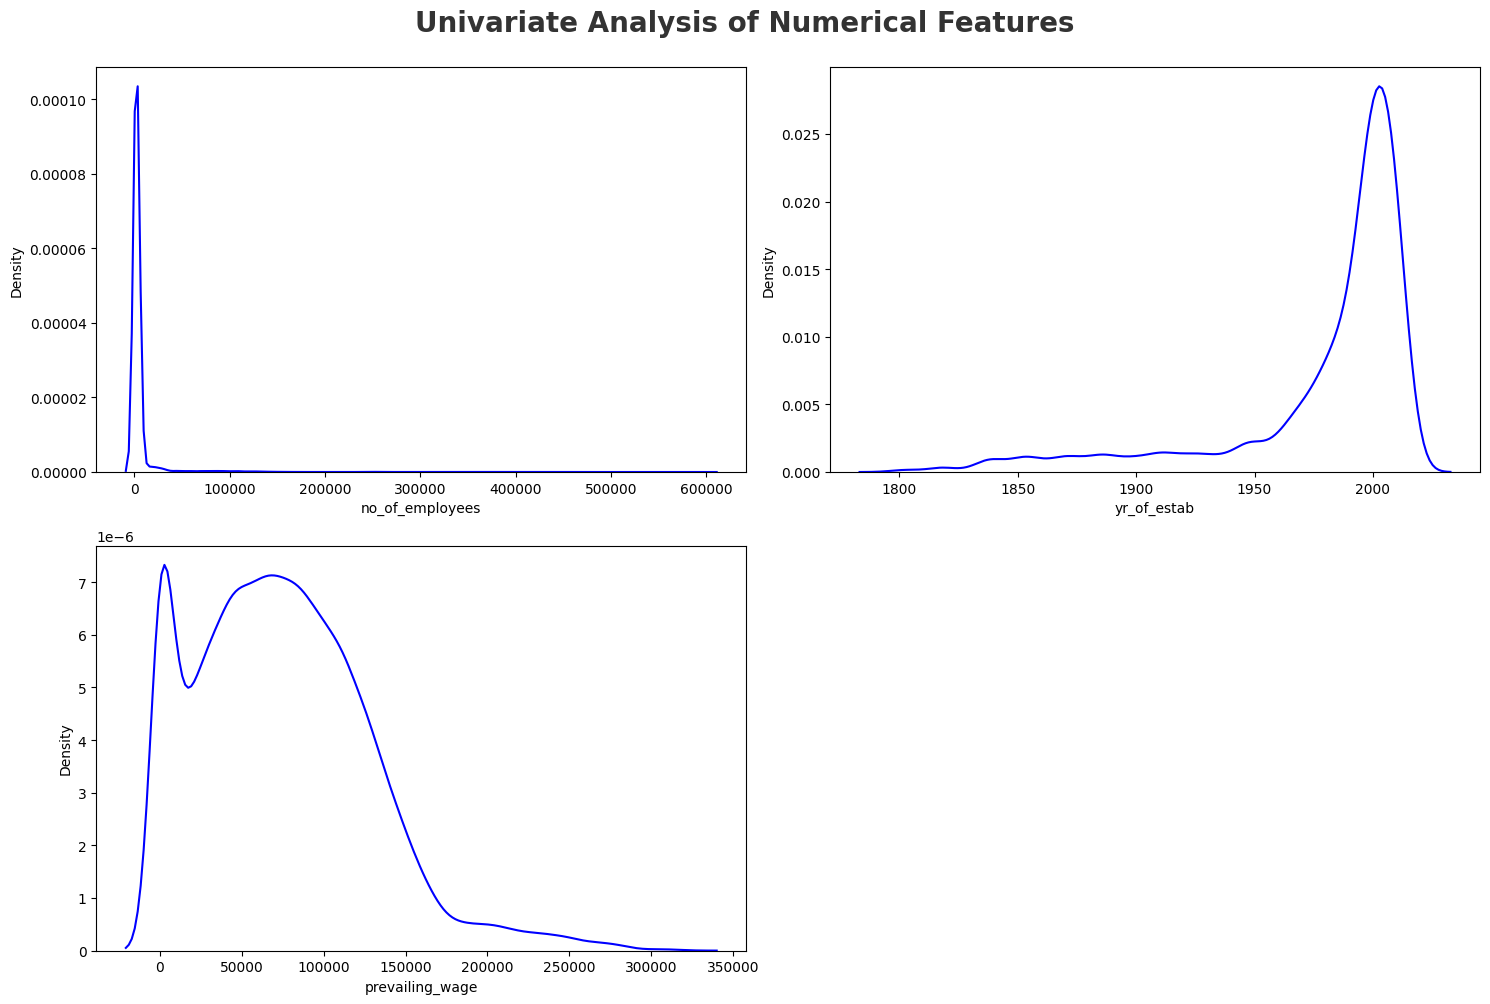

In [12]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range (0, len(numeric_features)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[numeric_features[i]], color="blue")
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

## Insights:
1) no_of_employees : skewed may be because of outliers
2) yr_of_estab is a discrete feature
3) prevailing_wages is a right skewed distribution

# Categorical Features

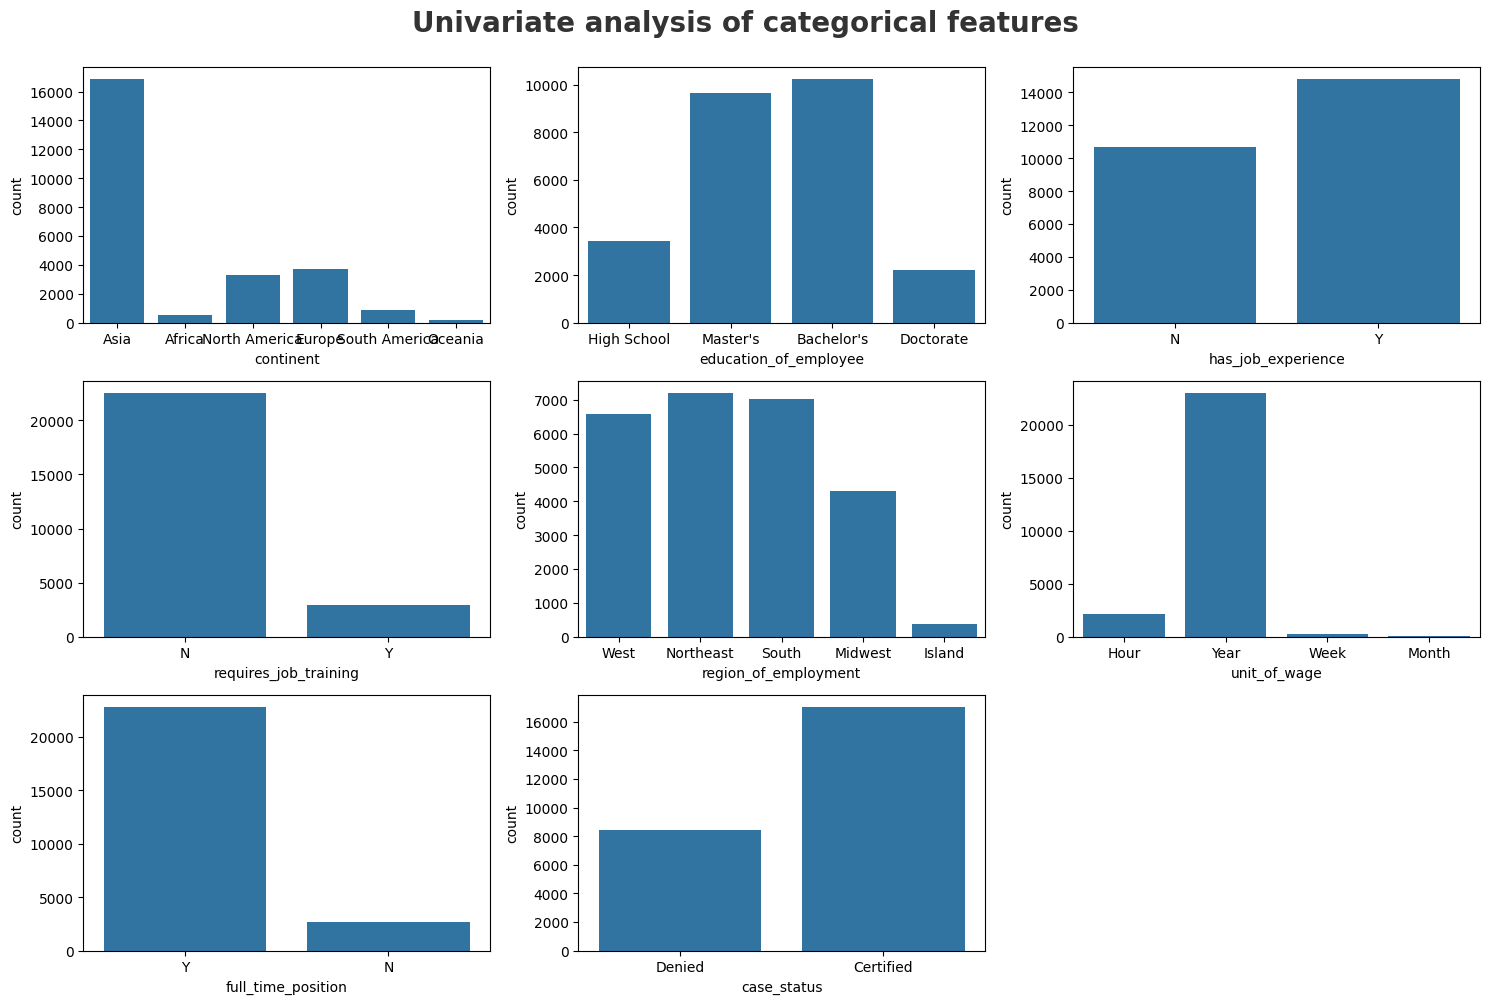

In [15]:
#categorical_features.remove('case_id')
plt.figure(figsize=(15,10))
plt.suptitle('Univariate analysis of categorical features', fontsize=20, fontweight="bold", alpha =0.8, y =1.0)

for i in range(0, len(categorical_features)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

## Insights
1) Continent column is more skewed towards asia --> more applicants from asia

# Multivariate Analysis

In [16]:
discrete_features = [feature for feature in numeric_features if len(df[feature].unique()) <= 25]
continuous_features = [feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features {}'.format(len(discrete_features),discrete_features))
print('We have {} continuous features {}'.format(len(continuous_features), continuous_features))

We have 0 discrete features []
We have 3 continuous features ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


## Check for Multicollinearity

### Perform a chi-squared test - to show the behaviour between two categorical variables
### Correlation between different columns and target column i.e case_status is studied

### H0 : Null Hypothesis i.e No collinearity between feature and target
### H1 : Alternative Hypthesis i.e High Collinearity between feature and target 

In [17]:
from scipy.stats import chi2_contingency

chi_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'],df[feature]))[1] < 0.05:
        chi_test.append("Reject Null Hypothesis")
    else:
        chi_test.append("Fail to Reject Null Hypothesis")

result = pd.DataFrame(data=[categorical_features, chi_test]).T
result.columns = ['Column','Hypothesis Result']
result        



,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


## Insights
### Except the requires_job_training feature rest of the features have high collinearity with confidence level of greater than 95%

In [18]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [21]:
print('Number of continuous features:', len(continuous_features))

Number of continuous features: 3


In [22]:
df.corr('pearson',numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


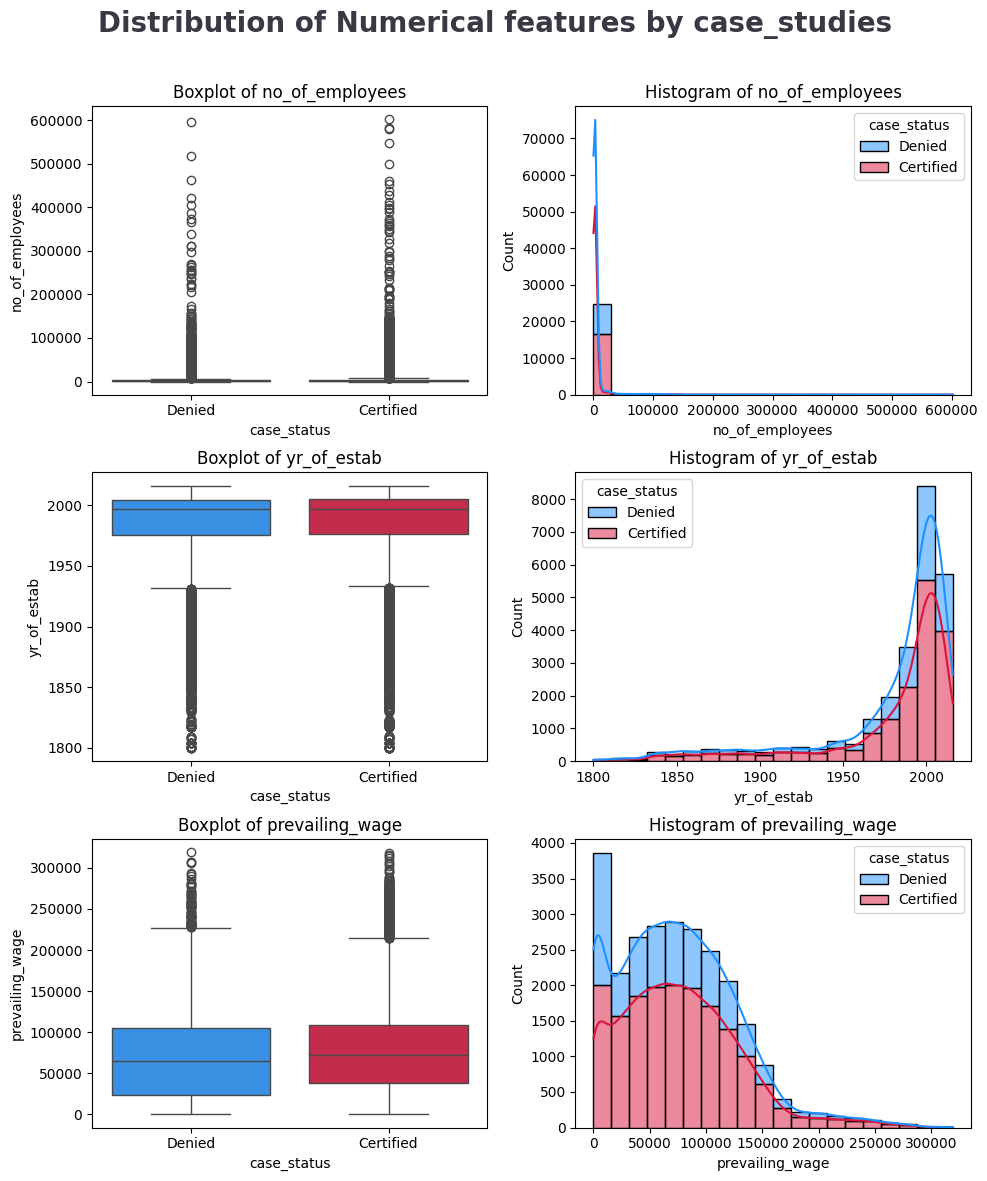

In [23]:
clr1 = ['#1E90FF','#DC143C']
fig,ax = plt.subplots(3,2,figsize=(10,12))
fig.suptitle('Distribution of Numerical features by case_studies',color='#3C3744',fontsize=20,fontweight='bold',ha='center')
for i,col in enumerate(continuous_features):
    sns.boxplot(data=df, x='case_status', y=col, palette=clr1,ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}',fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status',bins=20,kde=True, multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}',fontsize=12)

fig.tight_layout()
fig.subplots_adjust(top=0.90)    
